In [1]:
from docling_core.transforms.serializer.markdown import MarkdownTableSerializer
from docling_core.transforms.chunker.hierarchical_chunker import ChunkingDocSerializer
from docling_core.transforms.chunker.hybrid_chunker import HybridChunker
from docling_core.types.doc.document import DoclingDocument
from docling_core.transforms.chunker.tokenizer.base import BaseTokenizer

from util.docling_util import *

file_path = "./2408.09869v3_enriched.json"

doc = DoclingDocument.load_from_json(file_path)

In [2]:
from transformers import AutoTokenizer

from docling_core.transforms.chunker.tokenizer.huggingface import HuggingFaceTokenizer

EMBED_MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer: BaseTokenizer = HuggingFaceTokenizer(
    tokenizer=AutoTokenizer.from_pretrained(EMBED_MODEL_ID),
)

/Users/yoyo/opt/anaconda3/envs/cathay_llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
chunker = HybridChunker(tokenizer=tokenizer)
print(f"{tokenizer.get_max_tokens()=}")

tokenizer.get_max_tokens()=512


In [4]:
from typing import Iterable, Optional

from docling_core.transforms.chunker.base import BaseChunk
from docling_core.transforms.chunker.hierarchical_chunker import DocChunk
from docling_core.types.doc.labels import DocItemLabel

from rich.console import Console
from rich.panel import Panel

console = Console(
    width=200,  # uncomment to see Markdown tables rendered nicely
)

def find_n_th_chunk_with_label(iter: Iterable[BaseChunk], n: int, label: DocItemLabel) -> Optional[DocChunk]:
    num_found = -1
    for i, chunk in enumerate(iter):
        doc_chunk = DocChunk.model_validate(chunk)
        for it in doc_chunk.meta.doc_items:
            if it.label == label:
                num_found += 1
                if num_found == n:
                    return i, chunk
    return None, None

def print_chunk(chunks, chunk_pos):
    chunk = chunks[chunk_pos]
    ctx_text = chunker.contextualize(chunk=chunk)
    num_tokens = tokenizer.count_tokens(text=ctx_text)
    doc_items_refs = [it.self_ref for it in chunk.meta.doc_items]
    title = f"{chunk_pos=} {num_tokens=} {doc_items_refs=}"
    console.print(Panel(ctx_text, title=title))

In [ ]:
from typing import Any
from typing_extensions import override
from docling_core.transforms.serializer.base import BaseDocSerializer, SerializationResult
from docling_core.transforms.serializer.common import create_ser_result
from docling_core.transforms.serializer.markdown import MarkdownPictureSerializer
from docling_core.types.doc.document import PictureClassificationData, PictureDescriptionData, PictureItem, PictureMoleculeData
from docling_core.transforms.chunker.hierarchical_chunker import ChunkingSerializerProvider


class AnnotationPictureSerializer(MarkdownPictureSerializer):

    @override
    def serialize(
        self,
        *,
        item: PictureItem,
        doc_serializer: BaseDocSerializer,
        doc: DoclingDocument,
        separator: Optional[str] = None,
        **kwargs: Any,
    ) -> SerializationResult:
        text_parts: list[str] = []

        image_uri = str(item.image.uri)
        doc_name = doc.origin.filename
        print(item.image.uri)
        print(doc.origin.filename)

        #image_caption = summarize_image_openai(doc_name, image_uri)
        image_caption = "aaaa"

        """for annotation in item.annotations:
            if isinstance(annotation, PictureClassificationData):
                predicted_class = (
                    annotation.predicted_classes[0].class_name
                    if annotation.predicted_classes
                    else None
                )
                if predicted_class is not None:
                    text_parts.append(f"Picture type: {predicted_class}")
            elif isinstance(annotation, PictureMoleculeData):
                text_parts.append(f"SMILES: {annotation.smi}")
            elif isinstance(annotation, PictureDescriptionData):
                text_parts.append(f"Picture description: {annotation.text}")"""
        text_parts.append(image_caption)
        item.self_ref

        text_res = (separator or "\n").join(text_parts)
        text_res = doc_serializer.post_process(text=text_res)
        return create_ser_result(text=text_res, span_source=item)


2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

2408.09869v3.pdf

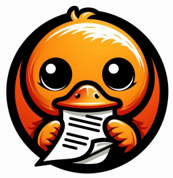
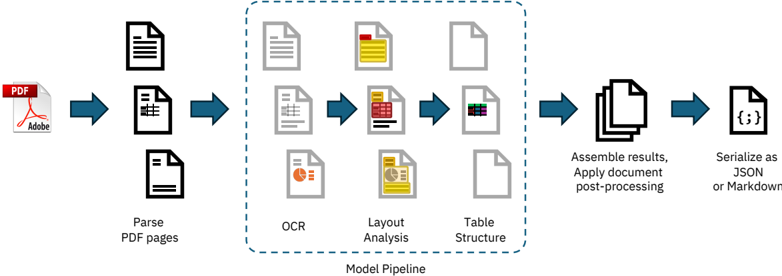
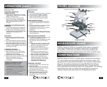
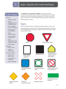
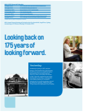
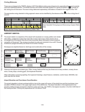
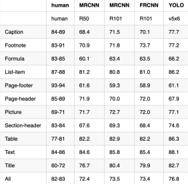
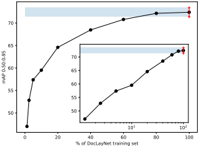
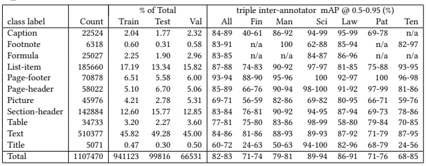
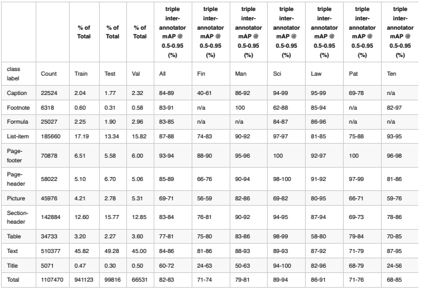
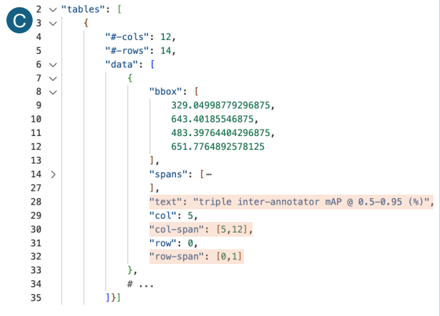

╭───────────────────────────────────────────────── chunk_pos=0 num_tokens=111 doc_items_refs=['#/pictures/0', '#/texts/2', '#/texts/3', '#/texts/4'] ──────────────────────────────────────────────────╮
│ Docling Technical Report                                                                                                                                                                             │
│ aaaa                                                                                                                                                                                                 │
│ Version 1.0                                                                                                                                                                                          │
│ Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta  │
│ Rafael Teixeira de Lima Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar                                                                                                  │
│ AI4K Group, IBM Research R¨ uschlikon, Switzerland                                                                                                                                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

schema_name='docling_core.transforms.chunker.DocMeta' version='1.0.0' doc_items=[DocItem(self_ref='#/pictures/0', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.PICTURE: 'picture'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=261.966552734375, t=715.8966522216797, r=348.65899658203125, b=627.1333770751953, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))]), DocItem(self_ref='#/texts/2', parent=RefItem(cref='#/groups/0'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TEXT: 'text'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=283.31, t=511.978, r=328.69, b=503.426, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 11))]), DocItem(self_ref='#/texts/3', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TEXT: 'text'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=113.643, t=481.532, r=498.

In [8]:
class ImgAnnotationSerializerProvider(ChunkingSerializerProvider):
    def get_serializer(self, doc: DoclingDocument):
        return ChunkingDocSerializer(
            doc=doc,
            picture_serializer=AnnotationPictureSerializer(),  # configuring a different picture serializer
        )

chunker = HybridChunker(
    tokenizer=tokenizer,
    serializer_provider=ImgAnnotationSerializerProvider(),
)

chunk_iter = chunker.chunk(dl_doc=doc)

chunks = list(chunk_iter)
i, chunk = find_n_th_chunk_with_label(chunks, n=0, label=DocItemLabel.PICTURE)
print_chunk(
    chunks=chunks,
    chunk_pos=i,
)
print(chunk.meta)

In [27]:
import logging
import time
from pathlib import Path
from transformers import AutoTokenizer
from docling.chunking import HybridChunker

In [2]:
from docling_core.types.doc import ImageRefMode, PictureItem, TableItem

In [3]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption

/Users/yoyo/opt/anaconda3/envs/cathay_llm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
_log = logging.getLogger(__name__)

In [5]:
IMAGE_RESOLUTION_SCALE = 5.0

In [12]:
logging.basicConfig(level=logging.INFO)

input_doc_path = Path("./test_doc/國泰金融控股股份有限公司_後台維護系統管理作業要點_F.pdf")
output_dir = Path("testWfigure")

# Important: For operating with page images, we must keep them, otherwise the DocumentConverter
# will destroy them for cleaning up memory.
# This is done by setting PdfPipelineOptions.images_scale, which also defines the scale of images.
# scale=1 correspond of a standard 72 DPI image
# The PdfPipelineOptions.generate_* are the selectors for the document elements which will be enriched
# with the image field
pipeline_options = PdfPipelineOptions()
pipeline_options.images_scale = IMAGE_RESOLUTION_SCALE
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = True

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

start_time = time.time()

conv_res = doc_converter.convert(input_doc_path)
conv_res_list = list(conv_res)

output_dir.mkdir(parents=True, exist_ok=True)
doc_filename = conv_res.input.file.stem

# Save images of figures and tables
table_counter = 0
picture_counter = 0
for element, _level in conv_res.document.iterate_items():
    """if isinstance(element, TableItem):
        table_counter += 1
        element_image_filename = (
            output_dir / f"{doc_filename}-table-{table_counter}.png"
        )
        with element_image_filename.open("wb") as fp:
            element.get_image(conv_res.document).save(fp, "PNG")"""

    if isinstance(element, PictureItem):
        picture_counter += 1
        element_image_filename = (
            output_dir / f"{doc_filename}-picture-{picture_counter}.png"
        )
        with element_image_filename.open("wb") as fp:
            element.get_image(conv_res.document).save(fp, "PNG")

end_time = time.time() - start_time

_log.info(f"Document converted and figures exported in {end_time:.2f} seconds.")

INFO:docling.document_converter:Going to convert document batch...
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.pipeline.base_pipeline:Processing document 國泰金融控股股份有限公司_後台維護系統管理作業要點_F.pdf
INFO:docling.document_converter:Finished converting document 國泰金融控股股份有限公司_後台維護系統管理作業要點_F.pdf in 14.39 sec.
INFO:__main__:Document converted and figures exported in 14.58 seconds.


In [18]:
conv_results = doc_converter.convert_all(
    [input_doc_path],
    raises_on_error=True,  # to let conversion run through all and examine results at the end
)

In [19]:
conv_res_list = list(conv_results)

INFO:docling.document_converter:Going to convert document batch...
INFO:docling.pipeline.base_pipeline:Processing document 國泰金融控股股份有限公司_後台維護系統管理作業要點_F.pdf
INFO:docling.document_converter:Finished converting document 國泰金融控股股份有限公司_後台維護系統管理作業要點_F.pdf in 7.83 sec.


self_ref='#/texts/0' parent=RefItem(cref='#/body') children=[] content_layer=<ContentLayer.BODY: 'body'> label=<DocItemLabel.SECTION_HEADER: 'section_header'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=169.02000427246094, t=766.35595703125, r=427.8000183105469, b=750.3309936523438, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 19))] orig='國泰優惠 APP 後台維護系統管理要點' text='國泰優惠 APP 後台維護系統管理要點' level=1
self_ref='#/texts/1' parent=RefItem(cref='#/body') children=[] content_layer=<ContentLayer.BODY: 'body'> label=<DocItemLabel.TEXT: 'text'> prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=371.70001220703125, t=724.6820068359375, r=542.3250122070312, b=692.6619873046875, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 45))] orig='中華民國 108 年 10 月 05 日訂定 中華民國 111 年 10 月 13 日修訂' text='中華民國 108 年 10 月 05 日訂定 中華民國 111 年 10 月 13 日修訂'
self_ref='#/texts/2' parent=RefItem(cref='#/body') children=[] content_layer=<ContentLayer.BODY: 'body'> label=<DocItemLab
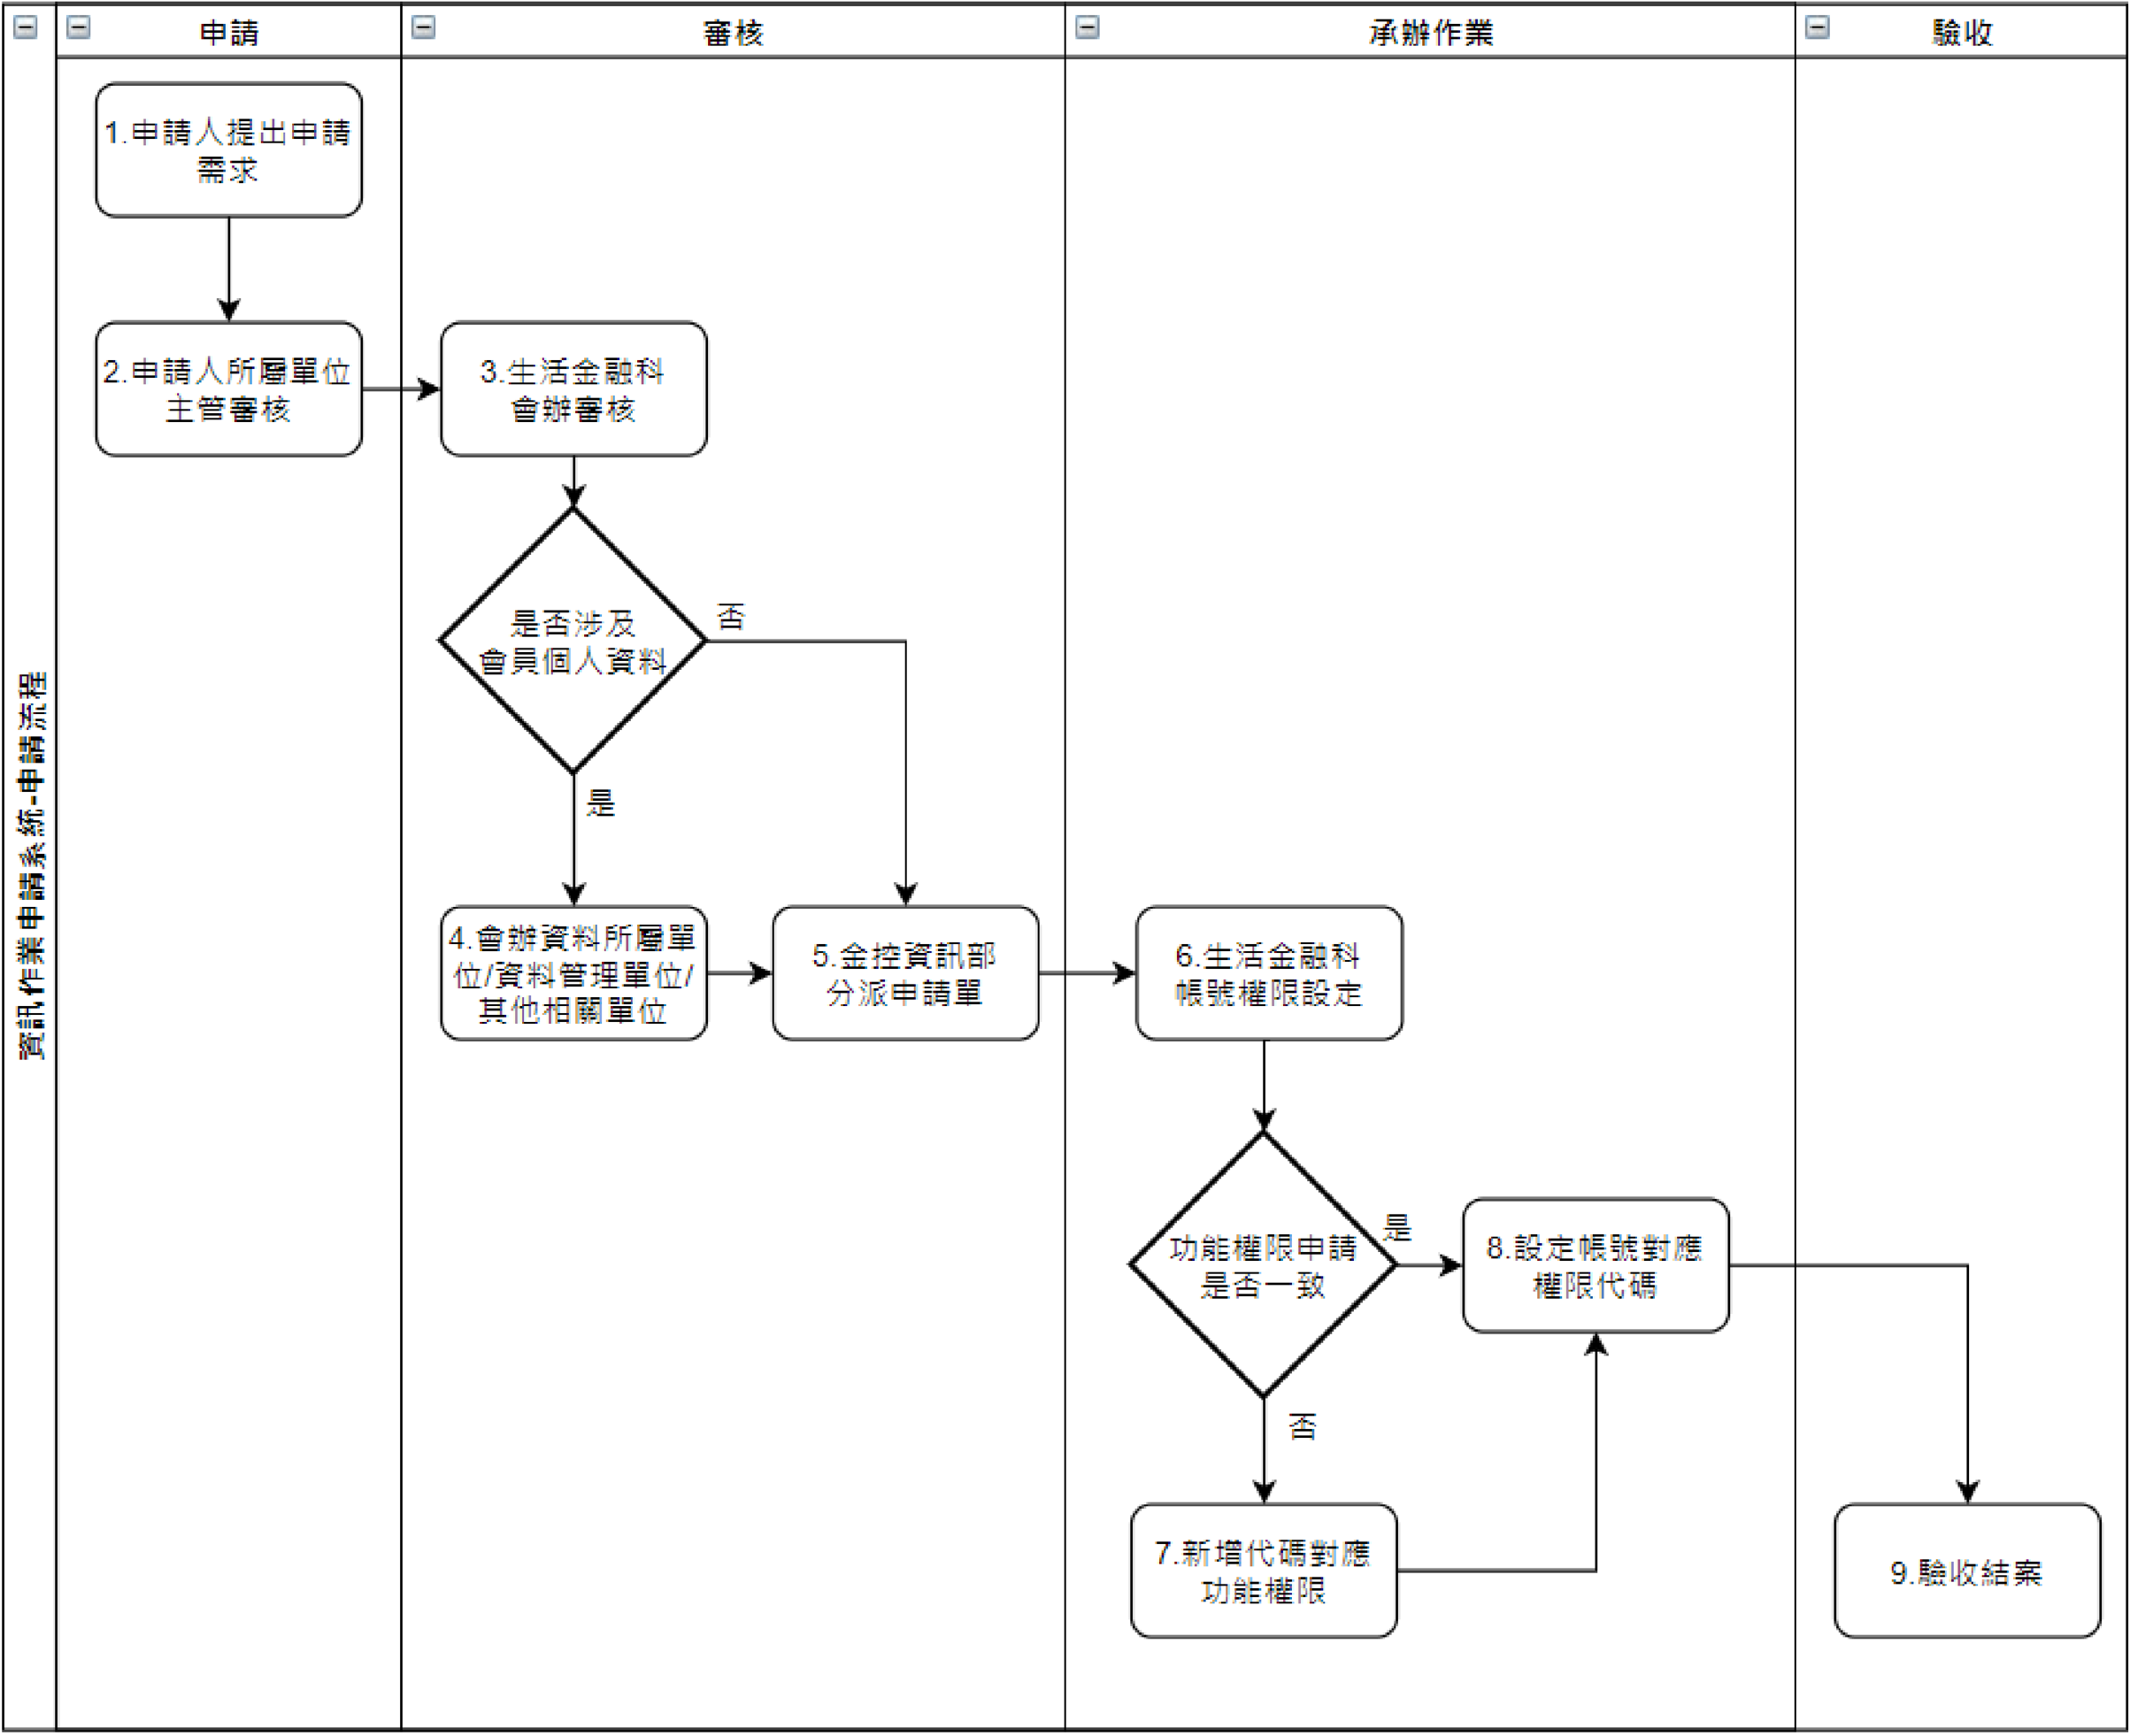

In [26]:
for e, _level in conv_res_list[0].document.iterate_items():
    print(e)


In [28]:
# Do hybrid chunking to merge similar chunk
tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-m3")

hybrid_chunker = HybridChunker(
    tokenizer=tokenizer,
    max_tokens=8000,
    merge_peers=True  # optional, defaults to True
)

In [30]:
# text chunks
all_chunks = []
for conv_res in conv_res_list:
    docling_docs = conv_res.document
    chunk_iter = hybrid_chunker.chunk(dl_doc=docling_docs)
    chunks = list(chunk_iter)
    all_chunks += chunks

In [32]:
for i, chunk in enumerate(all_chunks[:]):
    print(f"=== {i} ===")
    txt_tokens = len(tokenizer.tokenize(chunk.text))
    print(f"chunk.text ({txt_tokens} tokens):\n{repr(chunk.text)}")

    ser_txt = hybrid_chunker.serialize(chunk=chunk)
    ser_tokens = len(tokenizer.tokenize(ser_txt))
    print(f"chunker.serialize(chunk) ({ser_tokens} tokens):\n{repr(ser_txt)}")
    
    print(chunk.meta)

    print()

=== 0 ===
chunk.text (41 tokens):
'中華民國 108 年 10 月 05 日訂定 中華民國 111 年 10 月 13 日修訂\n權責單位：數位數據暨科技發展中心數位生態發展部'
chunker.serialize(chunk) (54 tokens):
'國泰優惠 APP 後台維護系統管理要點\n中華民國 108 年 10 月 05 日訂定 中華民國 111 年 10 月 13 日修訂\n權責單位：數位數據暨科技發展中心數位生態發展部'
schema_name='docling_core.transforms.chunker.DocMeta' version='1.0.0' doc_items=[DocItem(self_ref='#/texts/1', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TEXT: 'text'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=371.70001220703125, t=724.6820068359375, r=542.3250122070312, b=692.6619873046875, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 45))]), DocItem(self_ref='#/texts/2', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, label=<DocItemLabel.TEXT: 'text'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=263.5500183105469, t=675.8319702148438, r=542.3500366210938, b=663.8319702148438, coord_origin=<CoordOrigin.BOTTOMLE